In [78]:
%pip install -r requirements.txt -q

Note: you may need to restart the kernel to use updated packages.


In [79]:
import pandas as pd
import numpy as np
import warnings
from utils.visualization import show_basic_info, violin_plot, plot_ratio_returned, plot_ratio_returned_heatmap
from utils.preprocess import (preprocess_checkouts_df, preprocess_books_df, preprocess_customers_df, 
                              preprocess_libraries_df, merge_data)
warnings.filterwarnings('ignore')


## Books

In [80]:
books_df = pd.read_csv("data/books.csv")
display(books_df.head())
books_df = preprocess_books_df(books_df)
show_basic_info(books_df)

,id,title,authors,publisher,publishedDate,categories,price,pages
0,hVFwAAAAQBAJ,Ogilvy on Advertising,['David Ogilvy'],Vintage,2013-09-11,['Social Science'],72.99,320
1,bRY9AAAAYAAJ,Foreign Publications for Advertising American ...,['United States. Bureau of Foreign and Domesti...,NaN,1913,['Advertising'],469.99,654
2,ZapAAAAAIAAJ,Advertising and the Public Interest,"['John A. Howard', 'James Hulbert']",NaN,1973,['Advertising'],372.0,784
3,A-HthMfF5moC,Profitable Advertising,NaN,NaN,1894,['Advertising'],240.99USD,559
4,4Z9JAAAAMAAJ,Report of the Federal Trade Commission on Dist...,['United States. Federal Trade Commission'],NaN,1944,['Government publications'],539.0,757


,book_id,book_title,book_authors,book_publisher,book_publishedDate,book_categories,book_price,book_pages,book_age,book_expensive
0,hVFwAAAAQBAJ,Ogilvy on Advertising,[David Ogilvy],Vintage,2013,Social Science,72.99,320,12.0,False
1,bRY9AAAAYAAJ,Foreign Publications for Advertising American ...,[United States. Bureau of Foreign and Domestic...,unknown,1913,Advertising,469.99,654,112.0,True
2,ZapAAAAAIAAJ,Advertising and the Public Interest,"[John A. Howard, James Hulbert]",unknown,1973,Advertising,372.00,784,52.0,True
3,A-HthMfF5moC,Profitable Advertising,[],unknown,1894,Advertising,240.99,559,131.0,False
4,4Z9JAAAAMAAJ,Report of the Federal Trade Commission on Dist...,[United States. Federal Trade Commission],unknown,1944,Government publications,539.00,757,81.0,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   book_id             240 non-null    object 
 1   book_title          240 non-null    object 
 2   book_authors        240 non-null    object 
 3   book_publisher      240 non-null    object 
 4   book_publishedDate  238 non-null    object 
 5   book_categories     240 non-null    object 
 6   book_price          240 non-null    float64
 7   book_pages          240 non-null    int64  
 8   book_age            240 non-null    float64
 9   book_expensive      240 non-null    bool   
dtypes: bool(1), float64(2), int64(1), object(6)
memory usage: 17.2+ KB


None

,book_price,book_pages,book_age
count,240.000000,240.000000,240.000000
mean,279.918667,587.762500,64.437500
std,167.802894,164.169719,52.282987
min,0.000000,124.000000,0.000000
25%,151.740000,478.750000,18.000000
50%,282.500000,582.500000,44.500000
75%,391.240000,704.000000,112.000000
max,721.000000,1154.000000,195.000000


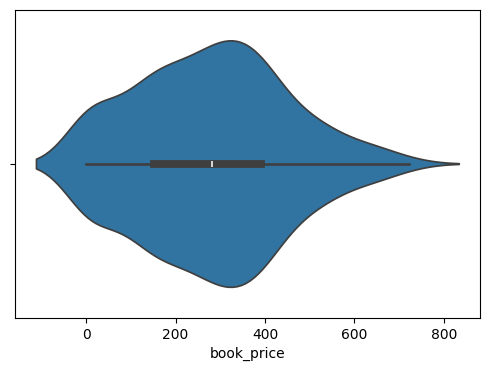

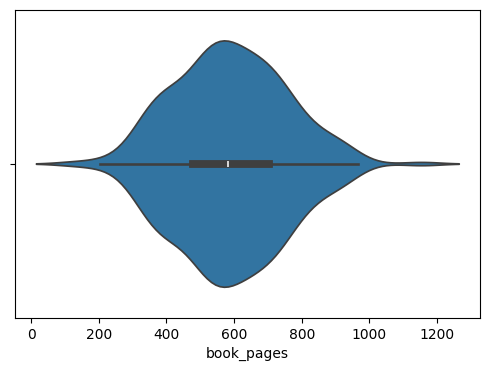

In [81]:
violin_plot(books_df.book_price)
violin_plot(books_df.book_pages)

## Customers

In [82]:
customers_df = pd.read_csv("data/customers.csv")
display(customers_df.head())
customers_df = preprocess_customers_df(customers_df)
show_basic_info(customers_df)

,id,name,street_address,city,state,zipcode,birth_date,gender,education,occupation
0,df83ec2d0d409395c0d8c2690cfa8b67,Cynthia Barnfield,44 NE Meikle Pl,Portland,Oregon,97213.0,2009-09-10,female,High School,NaN
1,6aec7ab2ea0d67161dac39e5dcabd857,Elizabeth Smith,7511 SE Harrison St,Portland,Oregon,97215.0,1956-12-15,female,College,Blue Collar
2,0c54340672f510fdb9d2f30595c1ab53,Richard Pabla,1404 SE Pine St,Portland,Oregon,97214.0,1960-12-18,male,College,Education & Health
3,f0d9ce833ddc1f73c1e0b55bdebf012e,Charles Baker,12271 N Westshore Dr,Portland,Oregon,97217.0,2105-07-19,male,Graduate Degree,SALES
4,3720379163f6b46944db6c98c0485bfd,Ronald Lydon,5321 NE Skyport Way,NaN,Oregon,97218.0,1961-03-14,male,Graduate Degree,Blue Collar


,customer_id,customer_name,customer_street_address,customer_city,customer_state,customer_zipcode,customer_birth_date,customer_gender,customer_education,customer_occupation,customer_age,customer_age_group
0,df83ec2d0d409395c0d8c2690cfa8b67,Cynthia Barnfield,44 Ne Meikle Pl,Portland,Oregon,972130.0,2009.0,female,high school,unknown,16.0,0-17
1,6aec7ab2ea0d67161dac39e5dcabd857,Elizabeth Smith,7511 Se Harrison St,Portland,Oregon,972150.0,1956.0,female,college,blue collar,69.0,65+
2,0c54340672f510fdb9d2f30595c1ab53,Richard Pabla,1404 Se Pine St,Portland,Oregon,972140.0,1960.0,male,college,education & health,65.0,36-65
3,f0d9ce833ddc1f73c1e0b55bdebf012e,Charles Baker,12271 N Westshore Dr,Portland,Oregon,972170.0,2105.0,male,graduate degree,sales,-80.0,NaN
4,3720379163f6b46944db6c98c0485bfd,Ronald Lydon,5321 Ne Skyport Way,unknown,Oregon,972180.0,1961.0,male,graduate degree,blue collar,64.0,36-65


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   customer_id              2000 non-null   object  
 1   customer_name            2000 non-null   object  
 2   customer_street_address  2000 non-null   object  
 3   customer_city            2000 non-null   object  
 4   customer_state           2000 non-null   object  
 5   customer_zipcode         1999 non-null   float64 
 6   customer_birth_date      1893 non-null   float64 
 7   customer_gender          2000 non-null   object  
 8   customer_education       2000 non-null   object  
 9   customer_occupation      2000 non-null   object  
 10  customer_age             1893 non-null   float64 
 11  customer_age_group       1799 non-null   category
dtypes: category(1), float64(3), object(8)
memory usage: 174.2+ KB


None

,customer_zipcode,customer_birth_date,customer_age
count,1999.000000,1893.000000,1893.000000
mean,972426.593297,1977.772847,47.227153
std,2274.250748,49.956748,49.956748
min,970050.000000,1800.000000,-95.000000
25%,972090.000000,1963.000000,29.000000
50%,972170.000000,1979.000000,46.000000
75%,972220.000000,1996.000000,62.000000
max,986850.000000,2120.000000,225.000000


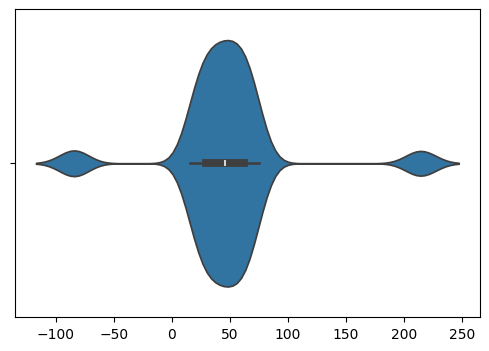

In [83]:
violin_plot(customers_df.customer_age.to_list())

## Libraries

In [84]:
libraries_df = pd.read_csv("data/libraries.csv")
display(libraries_df.head())
libraries_df = preprocess_libraries_df(libraries_df)
show_basic_info(libraries_df)

,id,name,street_address,city,region,postal_code
0,226-222@5xc-kc4-fpv,Multnomah County Library Capitol Hill,10723 SW capitol Hwy,Portland,OR,97219
1,23v-222@5xc-jv7-v4v,Multnomah County Library Northwest,2300 NW Thurman St,NaN,or,NaN
2,222-222@5xc-jvf-skf,Multnomah County Library St Johns,7510 N Charleston Ave,portland,or,97203
3,227-222@5xc-jww-btv,Multnomah County Library Hillsdale,1525 SW Sunset blvd,Portland,or,-97239
4,22d-222@5xc-kcy-8sq,Multnomah County Library Sellwood Moreland,7860 SE 13th AVE,Portland,OR,97202


,library_id,library_name,library_street_address,library_city,library_region,library_postal_code
0,226-222@5xc-kc4-fpv,Multnomah County Library Capitol Hill,10723 Sw Capitol Hwy,Portland,OR,97219.0
1,23v-222@5xc-jv7-v4v,Multnomah County Library Northwest,2300 Nw Thurman St,unknown,OR,NaN
2,222-222@5xc-jvf-skf,Multnomah County Library St Johns,7510 N Charleston Ave,Portland,OR,97203.0
3,227-222@5xc-jww-btv,Multnomah County Library Hillsdale,1525 Sw Sunset Blvd,Portland,OR,97239.0
4,22d-222@5xc-kcy-8sq,Multnomah County Library Sellwood Moreland,7860 Se 13Th Ave,Portland,OR,97202.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   library_id              18 non-null     object 
 1   library_name            18 non-null     object 
 2   library_street_address  18 non-null     object 
 3   library_city            18 non-null     object 
 4   library_region          18 non-null     object 
 5   library_postal_code     15 non-null     float64
dtypes: float64(1), object(5)
memory usage: 992.0+ bytes


None

,library_postal_code
count,15.000000
mean,97213.866667
std,10.527967
min,97202.000000
25%,97205.500000
50%,97212.000000
75%,97217.000000
max,97239.000000


## Checkouts

In [85]:
checkouts_df = pd.read_csv("data/checkouts.csv")
display(checkouts_df.head())
checkouts_df = preprocess_checkouts_df(checkouts_df)
show_basic_info(checkouts_df)

,id,patron_id,library_id,date_checkout,date_returned
0,-xFj0vTLbRIC,b071c9c68228a2b1d00e6f53677e16da,225-222@5xc-jtz-hkf,2019-01-28,2018-11-13
1,HUX-y4oXl04C,8d3f63e1deed89d7ba1bf6a4eb101373,223-222@5xc-jxr-tgk,2018-05-29,2018-06-12
2,TQpFnkku2poC,4ae202f8de762591734705e0079d76df,228-222@5xc-jtz-hwk,2018-11-23,2019-01-24
3,OQ6sDwAAQBAJ,f9372de3c8ea501601aa3fb59ec0f524,23v-222@5xc-jv7-v4v,2018-01-15,2018-04-25
4,7T9-BAAAQBAJ,2cf3cc3b9e9f6c608767da8d350f77c9,225-222@5xc-jtz-hkf,2018-12-31,1804-01-23


,id,patron_id,library_id,date_checkout,date_returned,days_borrowed,late_return,checkout_month,checkout_dayofweek,return_due_date,return_due_date_dayofweek,is_holiday_checkout,is_holiday_for_return
1,HUX-y4oXl04C,8d3f63e1deed89d7ba1bf6a4eb101373,223-222@5xc-jxr-tgk,2018-05-29,2018-06-12,14.0,0,5,1,2018-06-26,Tuesday,False,False
2,TQpFnkku2poC,4ae202f8de762591734705e0079d76df,228-222@5xc-jtz-hwk,2018-11-23,2019-01-24,62.0,1,11,4,2018-12-21,Friday,False,False
3,OQ6sDwAAQBAJ,f9372de3c8ea501601aa3fb59ec0f524,23v-222@5xc-jv7-v4v,2018-01-15,2018-04-25,100.0,1,1,0,2018-02-12,Monday,True,False
6,CW-7tHAaVR0C,dd9f34e9d65126a2b02003d8ac60aaa4,22c-222@5xc-jwj-pvz,2018-01-10,2018-02-04,25.0,0,1,2,2018-02-07,Wednesday,False,False
8,t1e3BWziAc8C,3b85b2c7b424618f533329018e9a11d5,222-222@5xc-jv5-nt9,2018-06-23,2018-07-14,21.0,0,6,5,2018-07-21,Saturday,False,False


<class 'pandas.core.frame.DataFrame'>
Index: 1604 entries, 1 to 1999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         1604 non-null   object        
 1   patron_id                  1604 non-null   object        
 2   library_id                 1604 non-null   object        
 3   date_checkout              1604 non-null   datetime64[ns]
 4   date_returned              1604 non-null   datetime64[ns]
 5   days_borrowed              1604 non-null   float64       
 6   late_return                1604 non-null   int64         
 7   checkout_month             1604 non-null   int32         
 8   checkout_dayofweek         1604 non-null   int32         
 9   return_due_date            1604 non-null   datetime64[ns]
 10  return_due_date_dayofweek  1604 non-null   object        
 11  is_holiday_checkout        1604 non-null   bool          
 12  is_holiday_

None

,date_checkout,date_returned,days_borrowed,late_return,checkout_month,checkout_dayofweek,return_due_date
count,1604,1604,1604.000000,1604.000000,1604.000000,1604.000000,1604
mean,2006-10-18 00:22:26.633416448,2024-01-19 14:15:33.665835264,6302.578554,0.197007,6.437032,2.918953,2006-11-15 00:22:26.633416448
min,1800-08-09 00:00:00,2018-01-08 00:00:00,5.000000,0.000000,1.000000,0.000000,1800-09-06 00:00:00
25%,2018-03-12 18:00:00,2018-04-23 18:00:00,12.000000,0.000000,3.000000,1.000000,2018-04-09 18:00:00
50%,2018-06-17 00:00:00,2018-07-30 00:00:00,19.000000,0.000000,6.000000,3.000000,2018-07-15 00:00:00
75%,2018-09-21 06:00:00,2018-11-10 00:00:00,26.000000,0.000000,9.000000,5.000000,2018-10-19 06:00:00
max,2018-12-31 00:00:00,2120-09-14 00:00:00,79621.000000,1.000000,12.000000,6.000000,2019-01-28 00:00:00
std,NaN,NaN,18828.115630,0.397862,3.483733,1.972592,NaN


Seems good from cleaning perspective
To add:
    if late or not
Drop where days_borrowed is less then 0

## Merging data

In [86]:
data = merge_data(checkouts_df=checkouts_df, 
                  customers_df=customers_df, 
                  books_df=books_df,
                  libraries_df=libraries_df)

In [87]:
show_basic_info(data)

,id,patron_id,library_id,date_checkout,date_returned,days_borrowed,late_return,checkout_month,checkout_dayofweek,return_due_date,...,book_price,book_pages,book_age,book_expensive,library_name,library_street_address,library_city,library_region,library_postal_code,same_city
0,HUX-y4oXl04C,8d3f63e1deed89d7ba1bf6a4eb101373,223-222@5xc-jxr-tgk,2018-05-29,2018-06-12,14.0,0,5,1,2018-06-26,...,416.99,752,19.0,True,Multnomah County Library Woodstock,6008 Se 49Th Ave,Portland,OR,97206.0,True
1,TQpFnkku2poC,4ae202f8de762591734705e0079d76df,228-222@5xc-jtz-hwk,2018-11-23,2019-01-24,62.0,1,11,4,2018-12-21,...,217.00,790,21.0,False,Multnomah County Library,205 Ne Russell St,unknown,unknown,97212.0,False
3,CW-7tHAaVR0C,dd9f34e9d65126a2b02003d8ac60aaa4,22c-222@5xc-jwj-pvz,2018-01-10,2018-02-04,25.0,0,1,2,2018-02-07,...,414.50,561,28.0,True,Multnomah County Library Kenton,8226 N Denver Ave,Portland,OR,97217.0,True
4,t1e3BWziAc8C,3b85b2c7b424618f533329018e9a11d5,222-222@5xc-jv5-nt9,2018-06-23,2018-07-14,21.0,0,6,5,2018-07-21,...,149.00,530,31.0,False,Multnomah County Library North Portland,512 N Killingsworth St,Portland,OR,97217.0,True
5,2mtCAAAAYAAJ,365ab35282c5d61b319ff9cc3628e624,228-222@5xc-jtz-hwk,2018-08-07,2018-08-25,18.0,0,8,1,2018-09-04,...,432.50,684,101.0,True,Multnomah County Library,205 Ne Russell St,unknown,unknown,97212.0,False


<class 'pandas.core.frame.DataFrame'>
Index: 1215 entries, 0 to 1603
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         1215 non-null   object        
 1   patron_id                  1215 non-null   object        
 2   library_id                 1215 non-null   object        
 3   date_checkout              1215 non-null   datetime64[ns]
 4   date_returned              1215 non-null   datetime64[ns]
 5   days_borrowed              1215 non-null   float64       
 6   late_return                1215 non-null   int64         
 7   checkout_month             1215 non-null   int32         
 8   checkout_dayofweek         1215 non-null   int32         
 9   return_due_date            1215 non-null   datetime64[ns]
 10  return_due_date_dayofweek  1215 non-null   object        
 11  is_holiday_checkout        1215 non-null   bool          
 12  is_holiday_

None

,date_checkout,date_returned,days_borrowed,late_return,checkout_month,checkout_dayofweek,return_due_date,customer_zipcode,customer_birth_date,customer_age,book_price,book_pages,book_age,library_postal_code
count,1215,1215,1215.000000,1215.000000,1215.000000,1215.000000,1215,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1005.000000
mean,2018-06-29 03:41:37.777777664,2018-07-23 19:25:02.222222336,24.655144,0.096296,6.440329,2.967078,2018-07-27 03:41:37.777777664,972393.374486,1979.573663,45.426337,285.030247,593.949794,64.703704,97213.863682
min,2018-01-01 00:00:00,2018-01-09 00:00:00,5.000000,0.000000,1.000000,0.000000,2018-01-29 00:00:00,970050.000000,1950.000000,16.000000,0.000000,124.000000,0.000000,97202.000000
25%,2018-03-29 00:00:00,2018-04-19 00:00:00,11.000000,0.000000,3.000000,1.000000,2018-04-26 00:00:00,972060.000000,1965.000000,31.000000,150.990000,479.000000,19.000000,97205.000000
50%,2018-06-27 00:00:00,2018-07-21 00:00:00,17.000000,0.000000,6.000000,3.000000,2018-07-25 00:00:00,972160.000000,1979.000000,46.000000,285.990000,596.000000,45.000000,97212.000000
75%,2018-09-29 00:00:00,2018-10-25 00:00:00,23.000000,0.000000,9.000000,5.000000,2018-10-27 00:00:00,972220.000000,1994.000000,60.000000,398.990000,703.000000,112.000000,97217.000000
max,2018-12-31 00:00:00,2019-05-21 00:00:00,179.000000,1.000000,12.000000,6.000000,2019-01-28 00:00:00,986850.000000,2009.000000,75.000000,721.000000,1154.000000,195.000000,97239.000000
std,NaN,NaN,30.964859,0.295119,3.486078,1.971519,NaN,2198.188891,17.195292,17.195292,175.701420,171.415129,51.644005,10.265806


In [88]:
data.to_csv("data/clean_merged_data.csv", index=False)

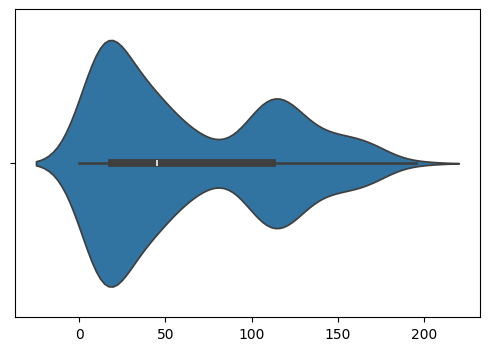

In [89]:
violin_plot(data.book_age.to_list())

In [90]:
print(data.isna().sum())

id                             0
patron_id                      0
library_id                     0
date_checkout                  0
date_returned                  0
days_borrowed                  0
late_return                    0
checkout_month                 0
checkout_dayofweek             0
return_due_date                0
return_due_date_dayofweek      0
is_holiday_checkout            0
is_holiday_for_return          0
customer_id                    0
customer_name                  0
customer_street_address        0
customer_city                  0
customer_state                 0
customer_zipcode               0
customer_birth_date            0
customer_gender                0
customer_education             0
customer_occupation            0
customer_age                   0
customer_age_group             0
book_id                        0
book_title                     0
book_authors                   0
book_publisher                 0
book_publishedDate            13
book_categ

## Correlation

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

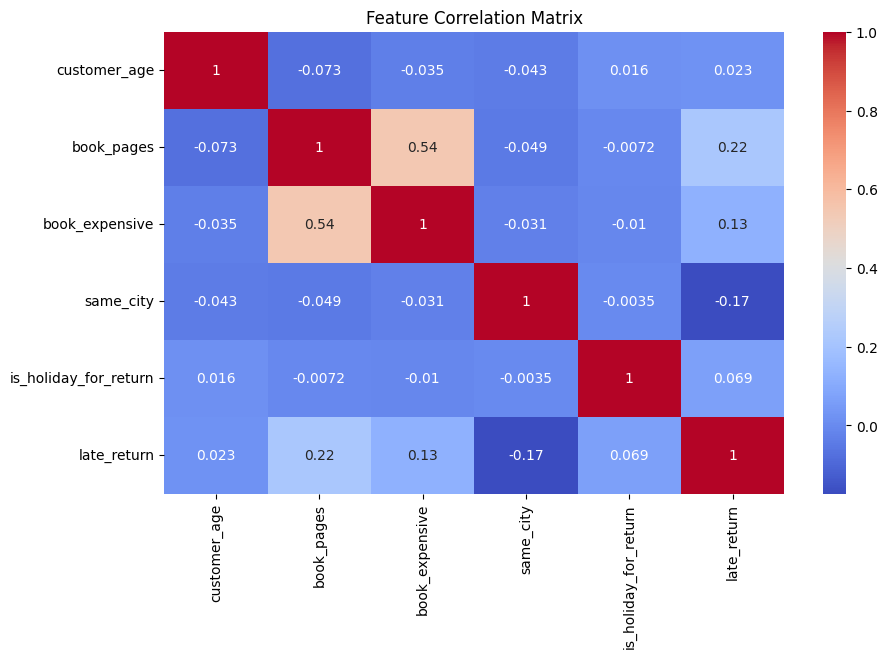

In [92]:
plt.figure(figsize=(10, 6))
sns.heatmap(data[['customer_age', 'book_pages', 'book_expensive', 'same_city', 'is_holiday_for_return', 'late_return']].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

## Visualization

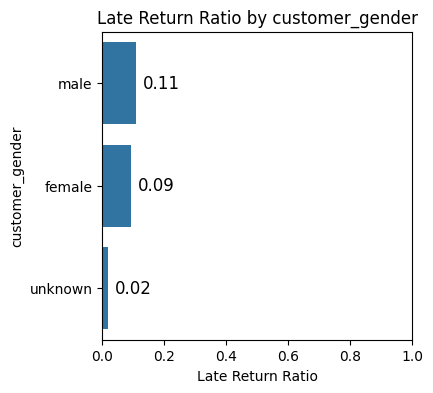

In [93]:

plot_ratio_returned(data, 'customer_gender')

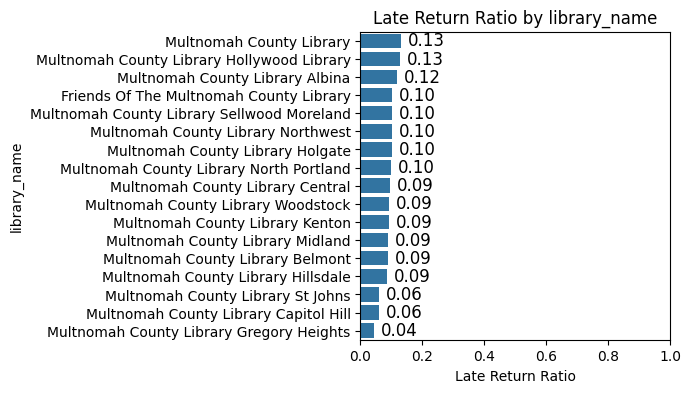

In [94]:
plot_ratio_returned(data, 'library_name')

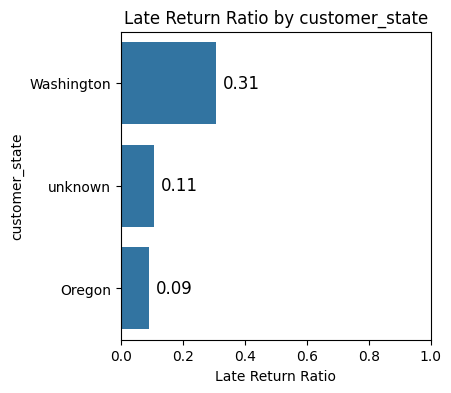

In [95]:
plot_ratio_returned(data, 'customer_state')


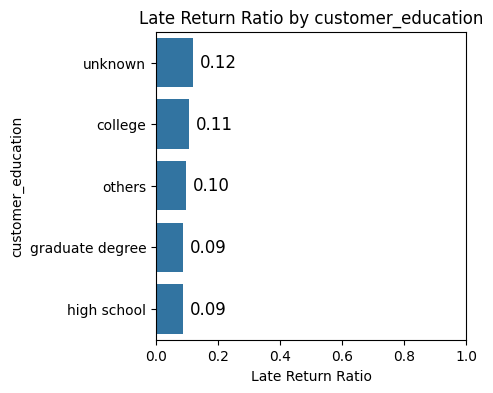

In [96]:
plot_ratio_returned(data, 'customer_education')


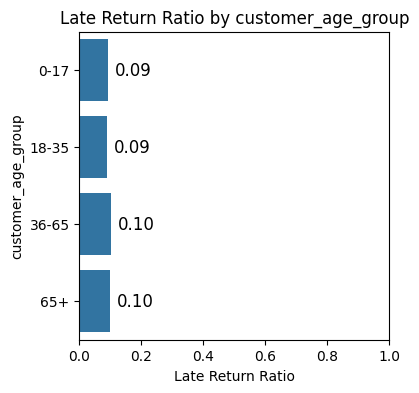

In [97]:
plot_ratio_returned(data, 'customer_age_group')

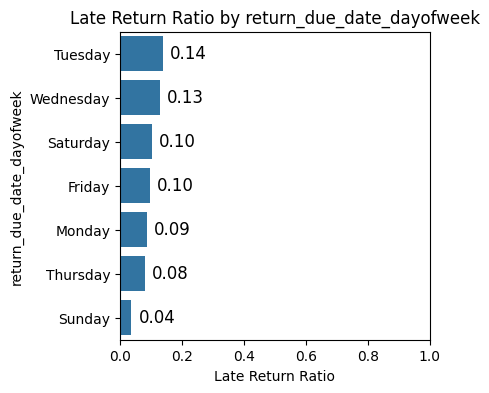

In [98]:
plot_ratio_returned(data, 'return_due_date_dayofweek')

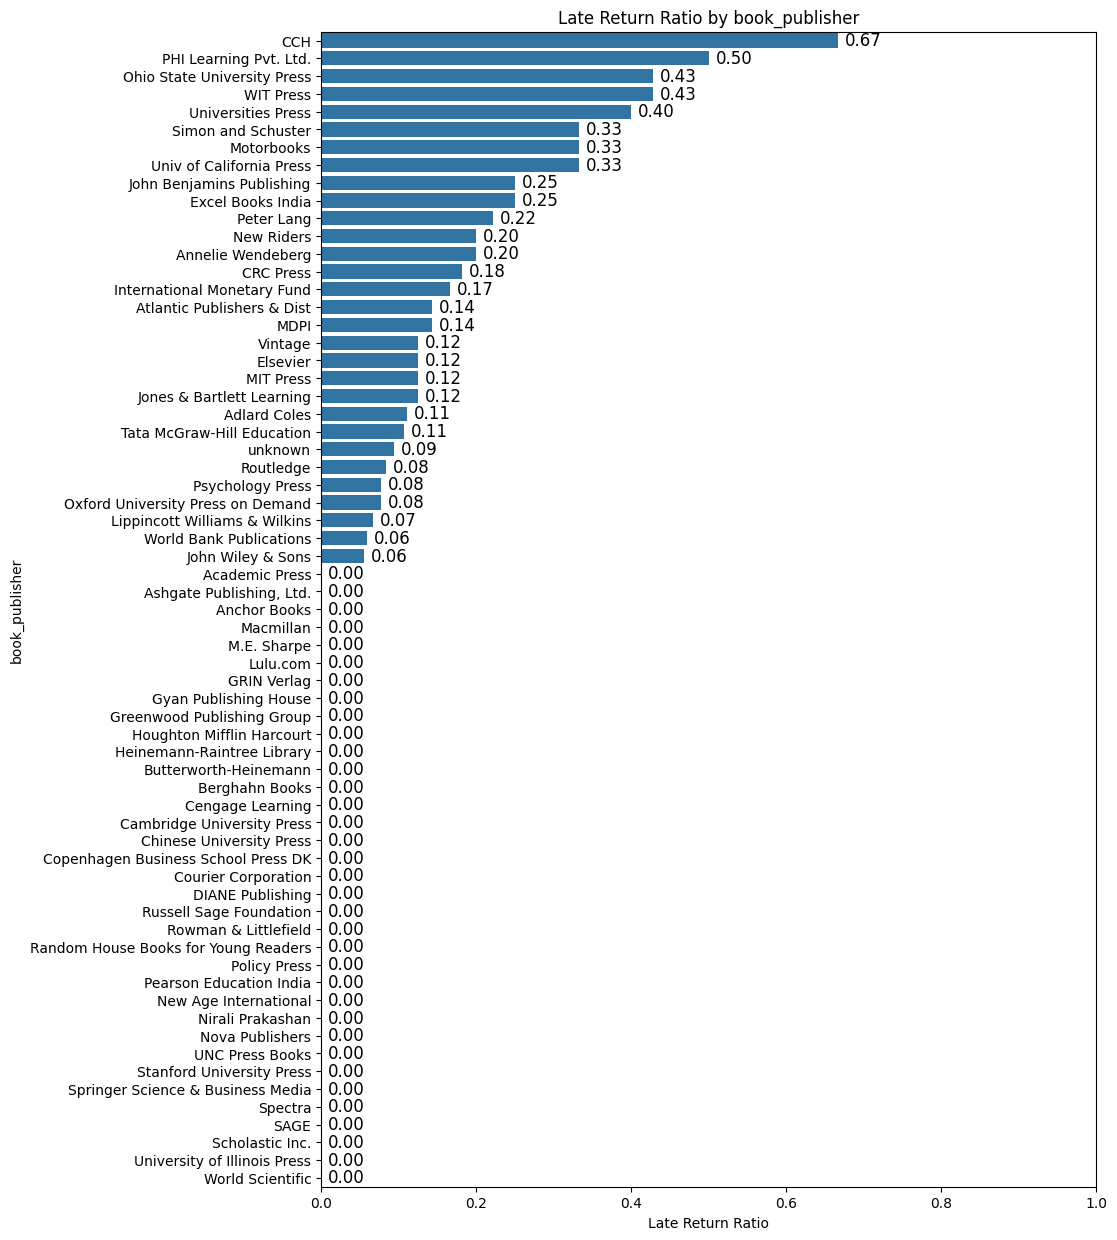

In [99]:
plot_ratio_returned(data, 'book_publisher', (10,15))

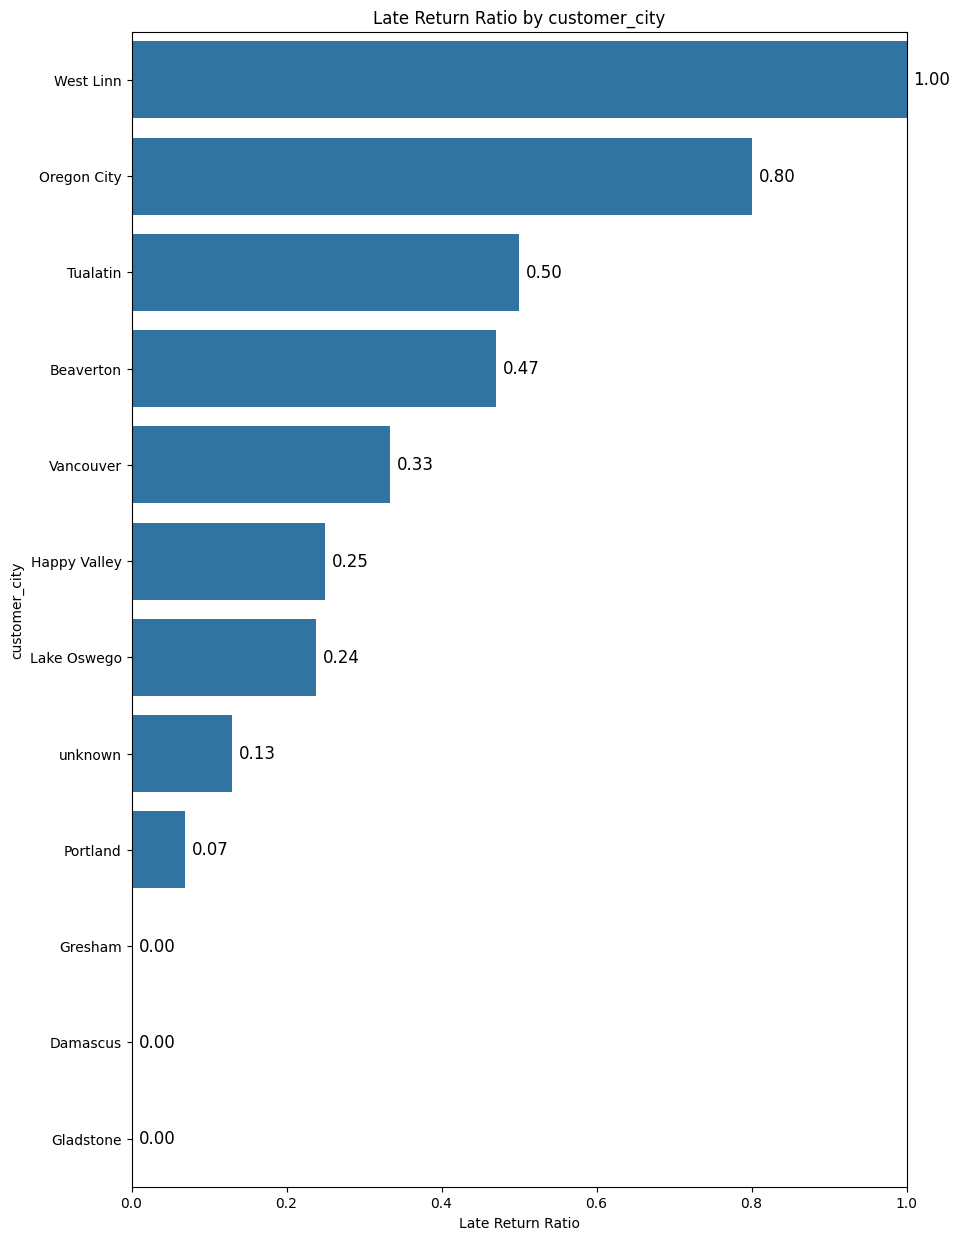

In [100]:
plot_ratio_returned(data, 'customer_city', (10,15))

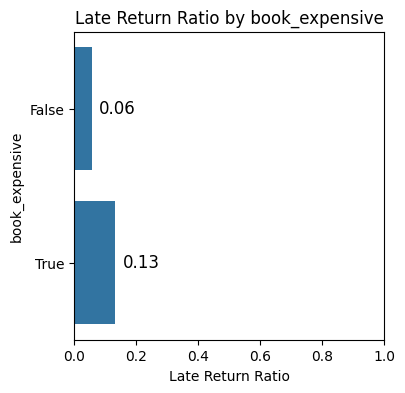

In [101]:
plot_ratio_returned(data, 'book_expensive')

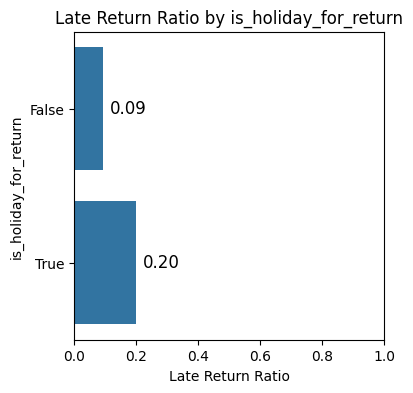

In [102]:

plot_ratio_returned(data, 'is_holiday_for_return')

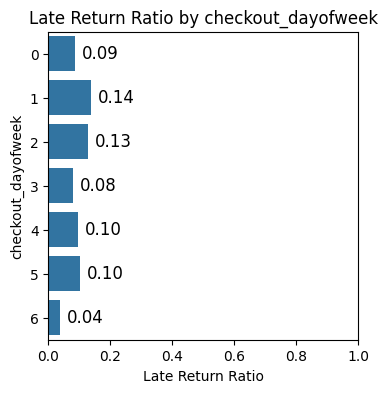

In [103]:

plot_ratio_returned(data, 'checkout_dayofweek')

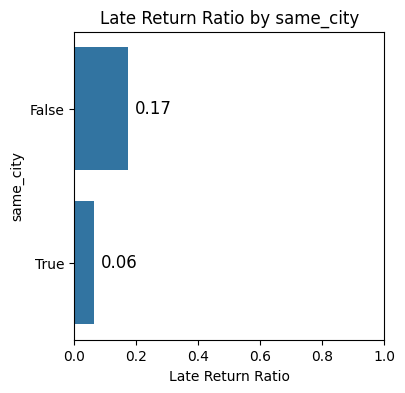

In [104]:
plot_ratio_returned(data, 'same_city')

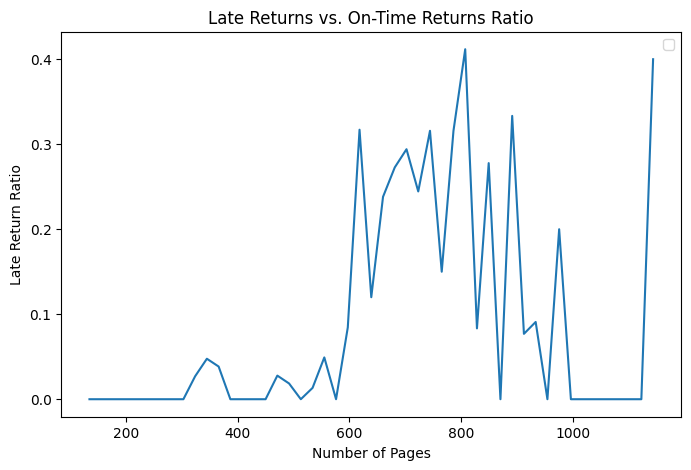

In [105]:
plt.figure(figsize=(8, 5))
bins = np.linspace(data['book_pages'].min(), data['book_pages'].max(), 50)
late_hist, _ = np.histogram(data[data['late_return'] == 1]['book_pages'], bins=bins)
on_time_hist, _ = np.histogram(data[data['late_return'] == 0]['book_pages'], bins=bins)

ratio = np.divide(late_hist, on_time_hist, out=np.zeros_like(late_hist, dtype=float), where=on_time_hist > 0)
bin_centers = (bins[:-1] + bins[1:]) / 2  

plt.plot(bin_centers, ratio)
plt.xlabel('Number of Pages')
plt.ylabel('Late Return Ratio')
plt.title('Late Returns vs. On-Time Returns Ratio')
plt.legend()
plt.show()

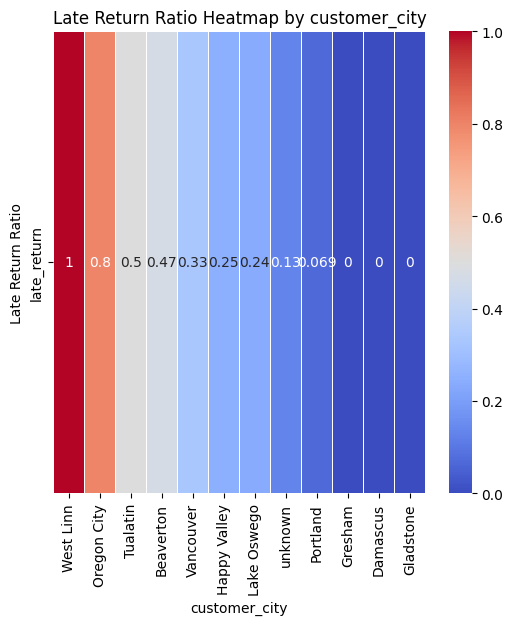

In [106]:
plot_ratio_returned_heatmap(data, 'customer_city')